In [75]:
import numpy as np
import pandas as pd
import os 
import sys
import time
import librosa
import pickle
import librosa.display
from matplotlib import pyplot as plt
from matplotlib.pyplot import specgram
import random

directory = os.getcwd()
print(directory)

I:\Miscs\Challenge\Music\src


In [3]:

def get_immediate_subdirectories(a_dir):
    return [name for name in os.listdir(a_dir)
            if os.path.isdir(os.path.join(a_dir, name))]



## Load description file

In [24]:
df_train = pd.read_csv("../data/train.csv")
gerne = pd.read_csv("../data/genres.csv")
print(gerne)

print(df_train.head())

#train_info = train_info.join(gerne, on= "Gerne", lsuffix="_train", rsuffix="_gerne")
df_train = pd.merge(df_train, gerne, on="Gerne")
print(df_train.head())



   Gerne             Gerne_detail
0      1                Cải Lương
1      2           Nhạc Cách Mạng
2      3  Nhạc Dân Ca - Quê Hương
3      4               Nhạc Dance
4      5           Nhạc Không Lời
5      6           Nhạc Thiếu Nhi
6      7               Nhạc Trịnh
7      8            Nhạc Trữ Tình
8      9                 Rap Việt
9     10                Rock Việt
                  Filename  Gerne
0  1001684131607489553.mp3      8
1  1005290758554877158.mp3      5
2  1014929727811186294.mp3      8
3  1024146325844559413.mp3      3
4  1027173258189106324.mp3      8
                  Filename  Gerne   Gerne_detail
0  1001684131607489553.mp3      8  Nhạc Trữ Tình
1  1014929727811186294.mp3      8  Nhạc Trữ Tình
2  1027173258189106324.mp3      8  Nhạc Trữ Tình
3  1032800108626650425.mp3      8  Nhạc Trữ Tình
4  1034509099970371693.mp3      8  Nhạc Trữ Tình


In [25]:
df_train.Gerne_detail.value_counts()

Nhạc Trữ Tình              2586
Nhạc Dân Ca - Quê Hương     523
Nhạc Cách Mạng              446
Nhạc Không Lời              392
Nhạc Thiếu Nhi              372
Nhạc Dance                  369
Nhạc Trịnh                  279
Rock Việt                    93
Rap Việt                     62
Cải Lương                    36
Name: Gerne_detail, dtype: int64

In [26]:

index = 1120

train_filename = df_train[index:index+1]
filename = train_filename.Filename
print(filename)

1120    4635414821955982911.mp3
Name: Filename, dtype: object


In [27]:
train_filename = df_train.Filename

filename = train_filename[1120]
gerne_detail = df_train.Gerne_detail[1120]
print(filename)

4635414821955982911.mp3


In [18]:
data, sampling_rate = librosa.load('../data/train/' + filename)

[[ 21.382496   14.781837   -5.9744635 ...   2.0064895   5.179878
   10.298065 ]
 [ 21.703938   15.422975    0.803703  ...  -1.1688052  -9.523781
    9.434792 ]
 [ 17.934439   18.385006   12.65597   ...   2.394159    5.8857484
    8.327459 ]
 ...
 [-30.74942   -30.74942   -30.74942   ... -30.74942   -30.74942
  -30.74942  ]
 [-30.74942   -30.74942   -30.74942   ... -30.74942   -30.74942
  -30.74942  ]
 [-30.74942   -30.74942   -30.74942   ... -30.74942   -30.74942
  -30.74942  ]]
[[-27.868084 -34.468742 -55.225044 ... -47.24409  -44.0707   -38.952515]
 [-27.546642 -33.827606 -48.446877 ... -50.419384 -58.77436  -39.81579 ]
 [-31.316141 -30.865574 -36.594612 ... -46.856422 -43.36483  -40.92312 ]
 ...
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]]


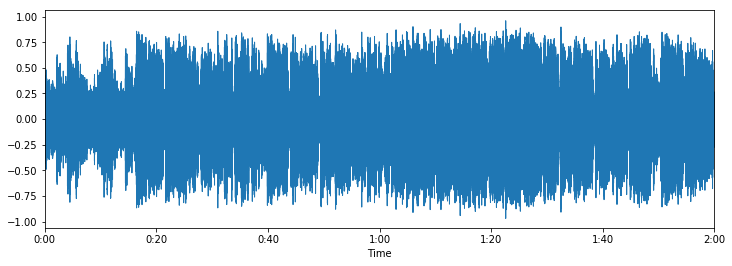

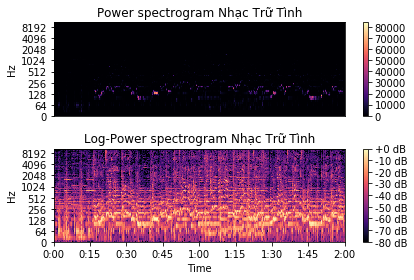

In [22]:
data, sampling_rate = librosa.load('../data/train/' + filename)

plt.figure(figsize=(12, 4))

librosa.display.waveplot(data, sr=sampling_rate)

 # log-amplitude
    
S = np.abs(librosa.stft(data))
print(librosa.power_to_db(S**2))

print(librosa.power_to_db(S**2, ref=np.max))

plt.figure()
plt.subplot(2, 1, 1)
librosa.display.specshow(S**2, sr=sampling_rate, y_axis='log')
plt.colorbar()
plt.title('Power spectrogram ' + gerne_detail)
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.power_to_db(S**2, ref=np.max), sr=sampling_rate, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Power spectrogram '+ gerne_detail)
plt.tight_layout()

### MFCCs


In [29]:
librosa.feature.mfcc(y=data, sr=sampling_rate)

array([[-109.35592051, -128.66572183, -159.64351089, ..., -169.1773292 ,
        -177.63223313, -193.86358556],
       [ 120.53394184,  120.53337039,  116.31530414, ...,   90.69264558,
          95.80756943,  110.62657358],
       [   9.49208839,   12.08299894,   17.52726683, ...,   35.2066536 ,
          31.09415389,   34.58001359],
       ...,
       [  21.84264501,   19.31015712,   15.63893892, ...,    6.2534218 ,
           2.88165388,    4.30894303],
       [   9.7041903 ,    9.5912363 ,   10.14084104, ...,   -5.86121635,
          -5.45228317,   -0.75787366],
       [  -6.89652999,   -9.77545974,  -11.56178357, ...,   -5.35938267,
          -4.95582205,   -1.6971013 ]])

In [43]:
S = librosa.feature.melspectrogram(y=data, sr=sampling_rate, n_mels=128,fmax=8000)
db_spectra = librosa.feature.mfcc(S=librosa.power_to_db(S))
print(db_spectra)

[[ -88.157623   -108.19492024 -141.44127434 ... -156.99828703
  -164.84670064 -178.88880732]
 [ 103.90869352  104.09220307   99.23831729 ...   84.15623325
    88.06930641  104.84034164]
 [  17.98932977   21.79442221   30.12825374 ...   41.97208868
    37.74059796   41.18047988]
 ...
 [  -9.35452757  -11.56934556  -11.75699224 ...   -8.21266776
    -7.49192862   -1.73977453]
 [ -15.10701042  -15.33742094  -14.09669538 ...   -9.41217017
   -11.16865312  -13.36269244]
 [ -16.42863951  -14.72405752  -12.0947621  ...    0.60106905
     2.61603641    2.47126865]]


In [40]:
mfccs = librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=40)

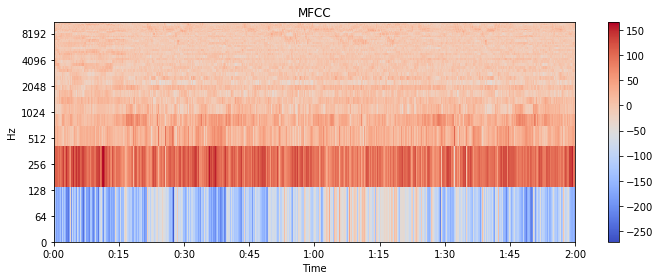

In [38]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

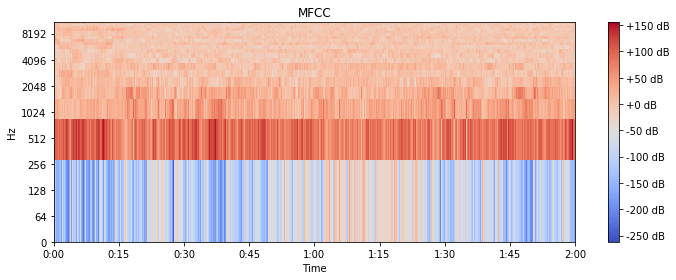

In [45]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(db_spectra, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.tight_layout()

In [100]:
SOUND_SAMPLE_LENGTH = 30000

HAMMING_SIZE = 100
HAMMING_STRIDE = 40


def prepossessingAudio(audioPath, ppFilePath):
    print('Preprocessing ' + audioPath)

    featuresArray = []
    for i in range(0, SOUND_SAMPLE_LENGTH, HAMMING_STRIDE):
        if i + HAMMING_SIZE <= SOUND_SAMPLE_LENGTH - 1:
            y, sr = librosa.load(audioPath, offset=i / 1000.0, duration=HAMMING_SIZE / 1000.0)

            # Let's make and display a mel-scaled power (energy-squared) spectrogram
            S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

            # Convert to log scale (dB). We'll use the peak power as reference.
            log_S = librosa.amplitude_to_db(S, ref=np.max)
            
            mfcc = librosa.feature.mfcc(S=log_S, sr=sr, n_mfcc=13)
            
            # featuresArray.append(mfcc)

            featuresArray.append(S)

            if len(featuresArray) == 599:
                break

    print('storing pp file: ' + ppFilePath)

    f = open(ppFilePath, 'wb')
    f.write(pickle.dumps(featuresArray))
    f.close()
    
    
def rreplace(s, old, new, occurrence):
    li = s.rsplit(old, occurrence)
    return new.join(li)


In [108]:
walk_dir = "../data/trimmed"
for root, subdirs, files in os.walk(walk_dir):
    print("root: " + root)
    print(subdirs)
    print(files)
    

root: ../data/trimmed
['pp']
['1001684131607489553.mp3', '1005290758554877158.mp3', '1014929727811186294.mp3', '1024146325844559413.mp3', '1027173258189106324.mp3', '1029264152990322219.mp3', '1032163695701952591.mp3', '1032800108626650425.mp3', '1033144136432980407.mp3', '1034509099970371693.mp3', '1035040638171135408.mp3', '1038603695851752938.mp3', '1038880100179569959.mp3', '1039729312861927394.mp3', '1039808532458280623.mp3', '1039945500025120836.mp3', '1040341033679410052.mp3', '1041370303636665148.mp3', '104185445737176022.mp3', '1042853731961486164.mp3', '1043584467124316947.mp3', '1044835149902176401.mp3', '1045102023242703108.mp3', '1045804577041634063.mp3', '1046931672829483070.mp3', '1048872335005369790.mp3', '1049820649853515207.mp3', '1051582512548708492.mp3', '1052542186139332453.mp3', '1060944138795219523.mp3', '1061209829307500333.mp3', '1061293420234917678.mp3', '1069565587955999995.mp3', '1070355740785706886.mp3', '1074072825690907234.mp3', '1083479320654251852.mp3',

In [ ]:
i = 0.0
for root, subdirs, files in os.walk(walk_dir):
        for filename in files:
            if filename.endswith('.mp3'):
                file_path = os.path.join(root, filename)
                ppfilepath = os.path.join(root, 'pp', filename)
                # print('\t- file %s (full path: %s)' % (filename, file_path))
                ppFileName = rreplace(ppfilepath, ".mp3", ".pp", 1)
                # if os.path.isfile(ppFileName):  # Skip if pp file already exist
                #     continue

                start_time = time.time()
                try:
                    prepossessingAudio(file_path, ppFileName)
                except Exception as e:
                    print ("Error occured : " + str(e))

                print("--- %s seconds ---" % (time.time() - start_time))

            if filename.endswith('mp3'):
                sys.stdout.write("\r%d%%" % int(i / 7620 * 100))
                sys.stdout.flush()
                i += 1

Preprocessing ../data/trimmed\1001684131607489553.mp3
storing pp file: ../data/trimmed\pp\1001684131607489553.pp
--- 53.43400025367737 seconds ---
0%Preprocessing ../data/trimmed\1005290758554877158.mp3
storing pp file: ../data/trimmed\pp\1005290758554877158.pp
--- 53.40300011634827 seconds ---
0%Preprocessing ../data/trimmed\1014929727811186294.mp3
storing pp file: ../data/trimmed\pp\1014929727811186294.pp
--- 52.597999811172485 seconds ---
0%Preprocessing ../data/trimmed\1024146325844559413.mp3
storing pp file: ../data/trimmed\pp\1024146325844559413.pp
--- 52.83999991416931 seconds ---
0%Preprocessing ../data/trimmed\1027173258189106324.mp3
storing pp file: ../data/trimmed\pp\1027173258189106324.pp
--- 51.82600021362305 seconds ---
0%Preprocessing ../data/trimmed\1029264152990322219.mp3
storing pp file: ../data/trimmed\pp\1029264152990322219.pp
--- 52.4689998626709 seconds ---
0%Preprocessing ../data/trimmed\1032163695701952591.mp3
storing pp file: ../data/trimmed\pp\1032163695701952